In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load data
train = pd.read_csv('train.csv')
weather_cols = [
    'temperature_2m_max',
    'temperature_2m_min',
    'apparent_temperature_min',
    'sunshine_duration',
    'daylight_duration',
    'wind_speed_10m_max',
    'wind_direction_10m_dominant',
    'shortwave_radiation_sum',
    'et0_fao_evapotranspiration',
]


In [12]:
weather_cols

['temperature_2m_max',
 'temperature_2m_min',
 'apparent_temperature_min',
 'sunshine_duration',
 'daylight_duration',
 'wind_speed_10m_max',
 'wind_direction_10m_dominant',
 'shortwave_radiation_sum',
 'et0_fao_evapotranspiration']

In [13]:
# Hitung matriks korelasi
corr_matrix = train[weather_cols].corr()

In [14]:
corr_matrix

,temperature_2m_max,temperature_2m_min,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
temperature_2m_max,1.000000,0.866094,0.882455,0.668189,0.740286,-0.183302,-0.025430,0.762344,0.868011
temperature_2m_min,0.866094,1.000000,0.990199,0.480649,0.688442,-0.102397,0.106474,0.583066,0.718213
apparent_temperature_min,0.882455,0.990199,1.000000,0.504279,0.696240,-0.170423,0.100521,0.602773,0.727908
sunshine_duration,0.668189,0.480649,0.504279,1.000000,0.728460,-0.278183,-0.087895,0.923204,0.853945
daylight_duration,0.740286,0.688442,0.696240,0.728460,1.000000,-0.173263,0.047707,0.883157,0.860717
wind_speed_10m_max,-0.183302,-0.102397,-0.170423,-0.278183,-0.173263,1.000000,0.146059,-0.250163,-0.152352
wind_direction_10m_dominant,-0.025430,0.106474,0.100521,-0.087895,0.047707,0.146059,1.000000,-0.082929,-0.054550
shortwave_radiation_sum,0.762344,0.583066,0.602773,0.923204,0.883157,-0.250163,-0.082929,1.000000,0.953101
et0_fao_evapotranspiration,0.868011,0.718213,0.727908,0.853945,0.860717,-0.152352,-0.054550,0.953101,1.000000


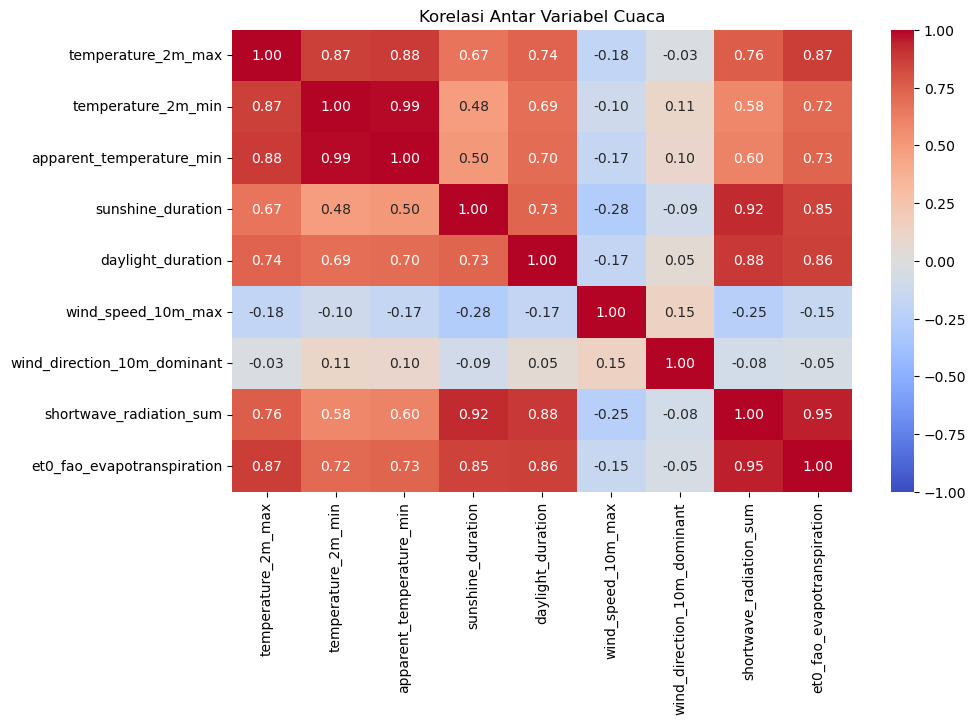

In [15]:
# Visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Korelasi Antar Variabel Cuaca")
plt.show()

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
# Hitung VIF untuk tiap variabel
vif_data = pd.DataFrame()
vif_data["feature"] = weather_cols
vif_data["VIF"] = [variance_inflation_factor(train[weather_cols].values, i) for i in range(len(weather_cols))]

print(vif_data)

                       feature         VIF
0           temperature_2m_max   51.486800
1           temperature_2m_min  165.530733
2     apparent_temperature_min   95.948344
3            sunshine_duration   41.359019
4            daylight_duration   86.445127
5           wind_speed_10m_max   15.172830
6  wind_direction_10m_dominant    5.730622
7      shortwave_radiation_sum  170.786077
8   et0_fao_evapotranspiration  104.170114


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[weather_cols])

# Aplikasi PCA
pca = PCA(n_components=2)  # Ubah jumlah komponen sesuai kebutuhan
X_pca = pca.fit_transform(X_scaled)

print("Variansi yang dijelaskan tiap komponen:", pca.explained_variance_ratio_)

Variansi yang dijelaskan tiap komponen: [0.62575834 0.14136551]


In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

# Pisahkan fitur dan target
X = train[weather_cols]
y = train['electricity_consumption']  # Sesuaikan dengan nama kolom target

# Train model Ridge
ridge = Ridge(alpha=1.0)  # Alpha bisa di-tuning
ridge.fit(X, y)

# Prediksi dan hitung RMSE
y_pred = ridge.predict(X)
rmse = sqrt(mean_squared_error(y, y_pred))
print(f"RMSE setelah Ridge: {rmse:.2f}")

RMSE setelah Ridge: 258.02
